In [7]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import numpy as np
import datetime as dt

import os
import requests
import yfinance as yf
from pathlib import Path
from dotenv import load_dotenv
from MCForecastTools import MCSimulation


In [8]:
# Load .env enviroment variables
load_dotenv()

True

In [9]:
#importing crypto historical data from csv
csv_path1 = Path ("project_files/BTC-USD_2017_2022.csv")
csv_path2 = Path ("project_files/ETH-USD_2017_2022.csv")
csv_path3 = Path ("project_files/XRP-USD_2017_2022.csv")



btc_historical = pd.read_csv(csv_path1, index_col="Date", infer_datetime_format=True, parse_dates=True)
eth_historical = pd.read_csv(csv_path2, index_col="Date", infer_datetime_format=True, parse_dates=True)
xrp_historical = pd.read_csv(csv_path3, index_col="Date", infer_datetime_format=True, parse_dates=True)




In [10]:
#importing Nasdaq, S&P and historical data using yfinance API
ada = yf.Ticker("ADA-USD")
doge = yf.Ticker("DOGE-USD")
ixic = yf.Ticker("^IXIC")
gspc = yf.Ticker("^GSPC")
axjo = yf.Ticker("^AXJO")

#set the start and end
ada_historical = ada.history(interval="1d", start="2017-01-01", end= "2022-01-01")
doge_historical = doge.history(interval="1d", start="2017-01-01", end= "2022-01-01")
ixic_historical = ixic.history(interval="1d", start="2017-01-01", end= "2022-01-01")
gspc_historical = gspc.history(interval="1d", start="2017-01-01", end= "2022-01-01")
axjo_historical = axjo.history(interval="1d", start="2017-01-01", end= "2022-01-01")

In [11]:


#drop columns
btc_historical.drop(['High',"Low", "Open", "Adj Close", "Volume"], axis=1, inplace=True)
eth_historical.drop(['High',"Low", "Open", "Adj Close", "Volume"], axis=1, inplace=True)
xrp_historical.drop(['High',"Low", "Open", "Adj Close", "Volume"], axis=1, inplace=True)
ixic_historical.drop(['High',"Low", "Open", "Stock Splits", "Volume", "Dividends"], axis=1, inplace=True)
gspc_historical.drop(['High',"Low", "Open", "Stock Splits", "Volume", "Dividends"], axis=1, inplace=True)
ada_historical.drop(['High',"Low", "Open", "Stock Splits", "Volume", "Dividends"], axis=1, inplace=True)
doge_historical.drop(['High',"Low", "Open", "Stock Splits", "Volume", "Dividends"], axis=1, inplace=True)
axjo_historical.drop(['High',"Low", "Open", "Stock Splits", "Volume", "Dividends"], axis=1, inplace=True)


In [12]:
#calculate percentage change, drop na and rename columns

btc_daily_change = btc_historical.pct_change().dropna().rename(columns={"Close":"Bitcoin"})
eth_daily_change = eth_historical.pct_change().dropna().rename(columns={"Close":"Ethereum"})
xrp_daily_change = xrp_historical.pct_change().dropna().rename(columns={"Close":"Ripple"})
ixic_daily_change =  ixic_historical.pct_change().dropna().rename(columns={"Close":"Nasdaq"})
gspc_daily_change = gspc_historical.pct_change().dropna().rename(columns={"Close":"S&P500"})
ada_daily_change = ada_historical.pct_change().dropna().rename(columns={"Close":"Cardano"})
doge_daily_change = doge_historical.pct_change().dropna().rename(columns={"Close":"Dogecoin"})
axjo_daily_change = axjo_historical.pct_change().dropna().rename(columns={"Close":"ASX"})




In [13]:
#concat dataframes
crypto_df = pd.concat([btc_daily_change, eth_daily_change, xrp_daily_change, ada_daily_change, doge_daily_change], axis="columns", join="inner")
stock_df = pd.concat([ixic_daily_change, gspc_daily_change, axjo_daily_change], axis="columns", join="inner")

combined_df = pd.concat([crypto_df, stock_df], axis="columns", join="inner")

combined_df


Bitcoin  Ethereum    Ripple   Cardano  Dogecoin    Nasdaq  \
Date                                                                     
2017-11-10 -0.073554 -0.067411 -0.050600 -0.153933 -0.178092  0.000132   
2017-11-13  0.102422  0.028606  0.030926  0.076365  0.166667  0.000987   
2017-11-14  0.011626  0.066037  0.031375  0.016352 -0.022296 -0.002920   
2017-11-15  0.102444 -0.012659  0.014922  0.008197  0.130912 -0.004699   
2017-11-16  0.076023 -0.007298  0.066450  0.042919  0.038088  0.012985   
...              ...       ...       ...       ...       ...       ...   
2021-12-21  0.043864  0.021967  0.077081  0.034419  0.023028  0.024041   
2021-12-22 -0.006296 -0.009492  0.007443  0.036836  0.011912  0.011785   
2021-12-23  0.044337  0.031621  0.040417  0.110426  0.065099  0.008471   
2021-12-29 -0.024042 -0.045348 -0.042494 -0.050953 -0.036481 -0.000982   
2021-12-30  0.015791  0.023514  0.028082  0.022243  0.021149 -0.001564   

              S&P500       ASX  
Date                            
2017-11-10 -0.000898 -0.003306  
2017-11-13  0.000984 -0.001261  
2017-11-14 -0.002310 -0.009266  
2017-11-15 -0.005526 -0.005330  
2017-11-16  0.008196  0.001567  
...              ...       ...  
2021-12-21  0.017778  0.008612  
2021-12-22  0.010180  0.001332  
2021-12-23  0.006224  0.003096  
2021-12-29  0.001402  0.012062  
2021-12-30 -0.002990  0.000479  

[1020 rows x 8 columns]

<AxesSubplot:xlabel='Date'>

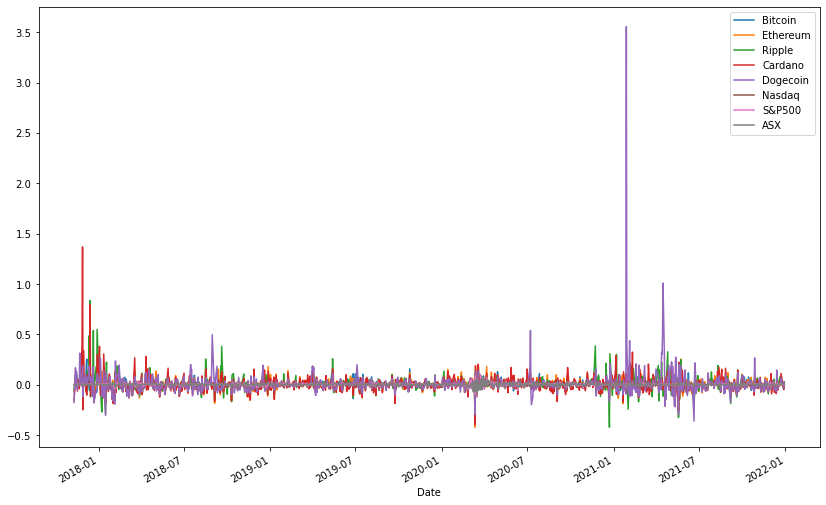

In [14]:
#plot daily returns
combined_df.plot(figsize=(14, 9))

In [15]:
#standard deviation 
combined_df.std()


Bitcoin     0.044738
Ethereum    0.055312
Ripple      0.076674
Cardano     0.084787
Dogecoin    0.137212
Nasdaq      0.014755
S&P500      0.013164
ASX         0.011082
dtype: float64

In [16]:
#plot cumulative returns

cum_returns = (1 + combined_df).cumprod() - 1

cum_returns.plot(figsize=(20,13))

<AxesSubplot:xlabel='Date'>

In [17]:
#calculating annualized standard deviation

annualized_btc_std= btc_daily_change.std() * np.sqrt(365)
annualized_eth_std= eth_daily_change.std() * np.sqrt(365)
annualized_xrp_std= xrp_daily_change.std() * np.sqrt(365)
annualized_ada_std= ada_daily_change.std() * np.sqrt(365)
annualized_doge_std= doge_daily_change.std() * np.sqrt(365)
annualized_ixic_std= ixic_daily_change.std() * np.sqrt(256)
annualized_gspc_std= gspc_daily_change.std() * np.sqrt(256)
annualized_axjo_std= axjo_daily_change.std() * np.sqrt(256)

print(f"The annualized standard deviation for Bitcoin is : {annualized_btc_std.values}")
print(f"The annualized standard deviation for Ethereum is : {annualized_eth_std.values}")
print(f"The annualized standard deviation for Ripple is : {annualized_xrp_std.values}")
print(f"The annualized standard deviation for Cardano is : {annualized_ada_std.values}")
print(f"The annualized standard deviation for Dogecoin is : {annualized_doge_std.values}")
print(f"The annualized standard deviation for S&P500 is : {annualized_gspc_std.values}")
print(f"The annualized standard deviation for Nasdaq is : {annualized_ixic_std.values}")
print(f"The annualized standard deviation for ASX is : {annualized_axjo_std.values}")

The annualized standard deviation for Bitcoin is : [0.80157159]
The annualized standard deviation for Ethereum is : [0.98978657]
The annualized standard deviation for Ripple is : [1.35829544]
The annualized standard deviation for Cardano is : [1.52254528]
The annualized standard deviation for Dogecoin is : [2.31070692]
The annualized standard deviation for S&P500 is : [0.1939719]
The annualized standard deviation for Nasdaq is : [0.21911942]
The annualized standard deviation for ASX is : [0.16489468]


<AxesSubplot:xlabel='Date'>

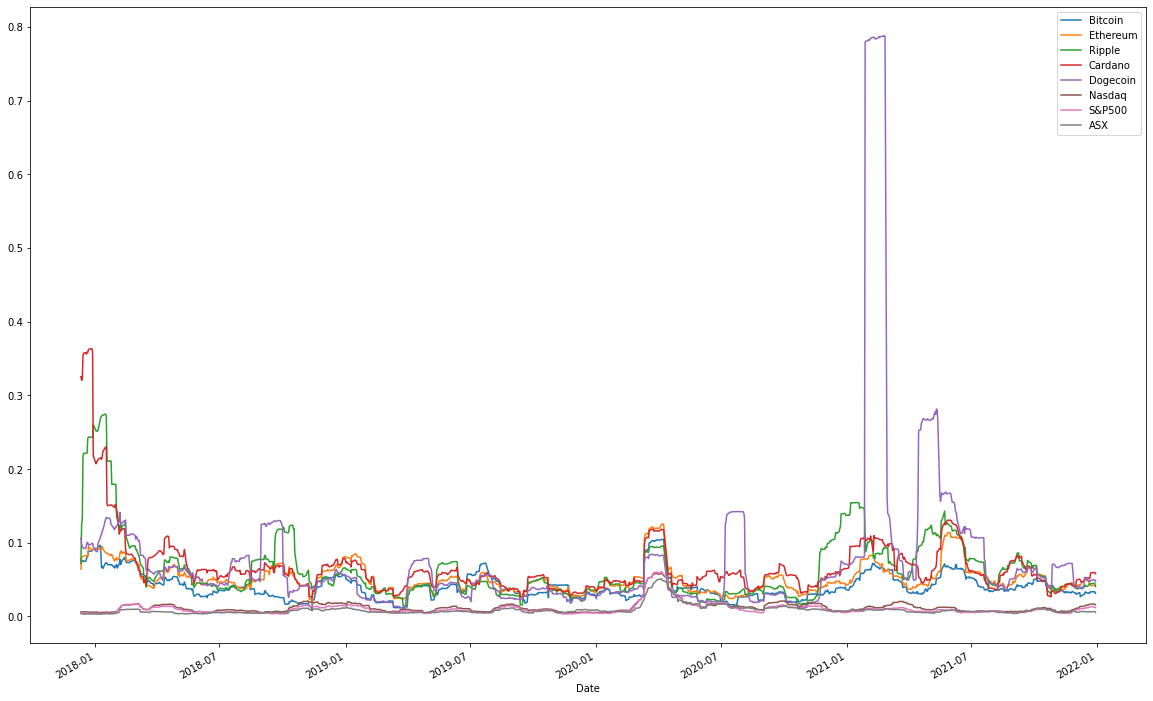

In [18]:
#calculating rolling standard deviation of the combined porfolio
combined_df.rolling(window =21).std().plot(figsize=(20, 13))


In [19]:
#correlation
correlation = combined_df.corr()
correlation.style.background_gradient(cmap="winter")

In [20]:
#sharpe ratios
sharpe_ratio_stocks = (stock_df.mean() *252) / (stock_df.std() * np.sqrt(252))
sharpe_ratio_crypto = (crypto_df.mean() *365) / (crypto_df.std() * np.sqrt(365))




In [21]:
stock_pl = px.bar(sharpe_ratio_stocks, title="Stock Market Sharpe Ratios")
crypto_pl =px.bar(sharpe_ratio_crypto, title="Crypto Market Sharpe Ratios" )

In [22]:

tabs = pn.Tabs(
    ("Stock", stock_pl),
    ("Crypto", crypto_pl)
    
    
    
)
tabs

Tabs
    [0] Plotly(Figure, name='Stock')
    [1] Plotly(Figure, name='Crypto')